<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:200%;text-align:left">Bikeshare Analysis & modelling</h1>


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Libraries</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
%matplotlib inline
plt.rc('figure',figsize=(17,13))
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
sbn.set_style('darkgrid')

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Loading Data</h1>


In [2]:
data=pd.read_csv('bikeshare.csv')

In [3]:
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.tail()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
data.apply(lambda x: len(x.unique()))

index         17379
date            731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
demand          869
dtype: int64

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Data Cleaning</h1>


In [8]:
data.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [9]:
data=data.drop(columns=['index','date','year'])

In [10]:
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Analysis & visualization</h1>


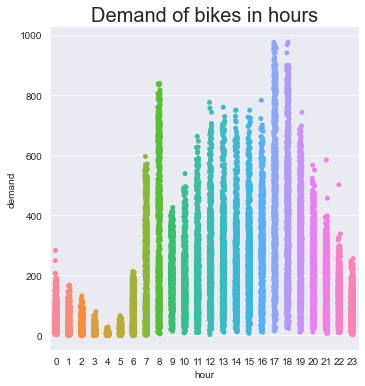

In [11]:
sbn.catplot(x='hour',y='demand',data=data)
plt.title("Demand of bikes in hours",size=20)
plt.show()

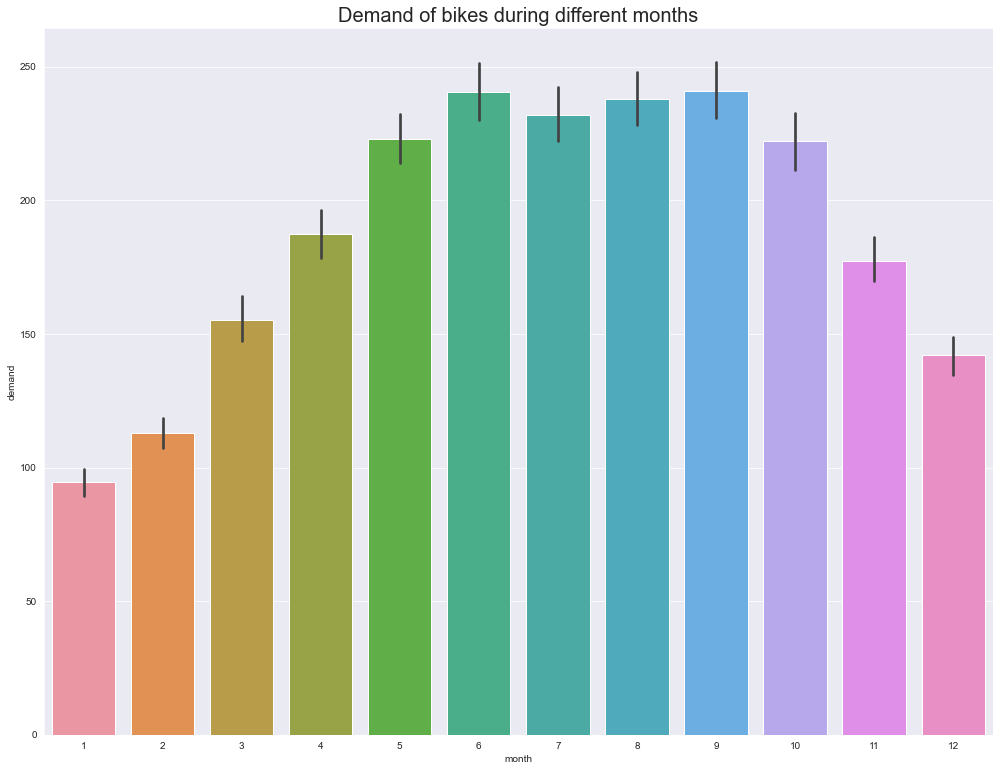

In [13]:
sbn.barplot(data=data,x='month',y='demand')
plt.title("Demand of bikes during different months",size=20)
plt.show()

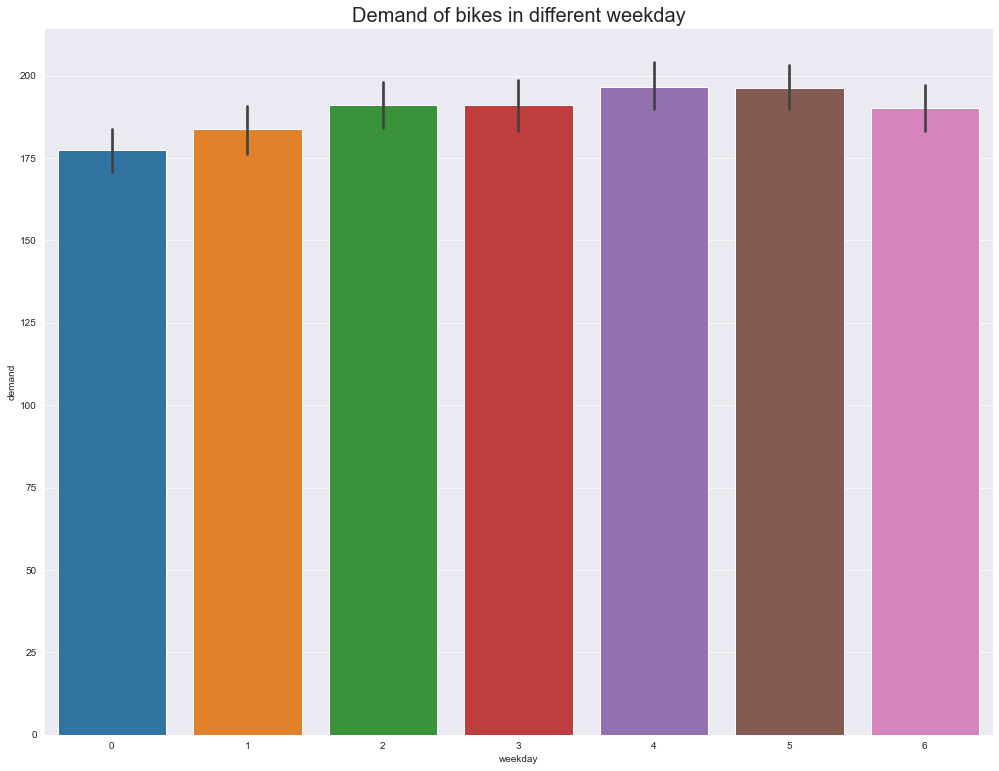

In [14]:
sbn.barplot(x ='weekday', y ='demand', data = data)
plt.title("Demand of bikes in different weekday",size=20)
plt.show()

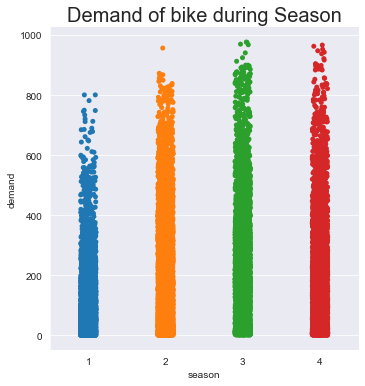

In [15]:
sbn.catplot(x='season',y='demand',data=data)
plt.title("Demand of bike during Season",size=20)
plt.show()

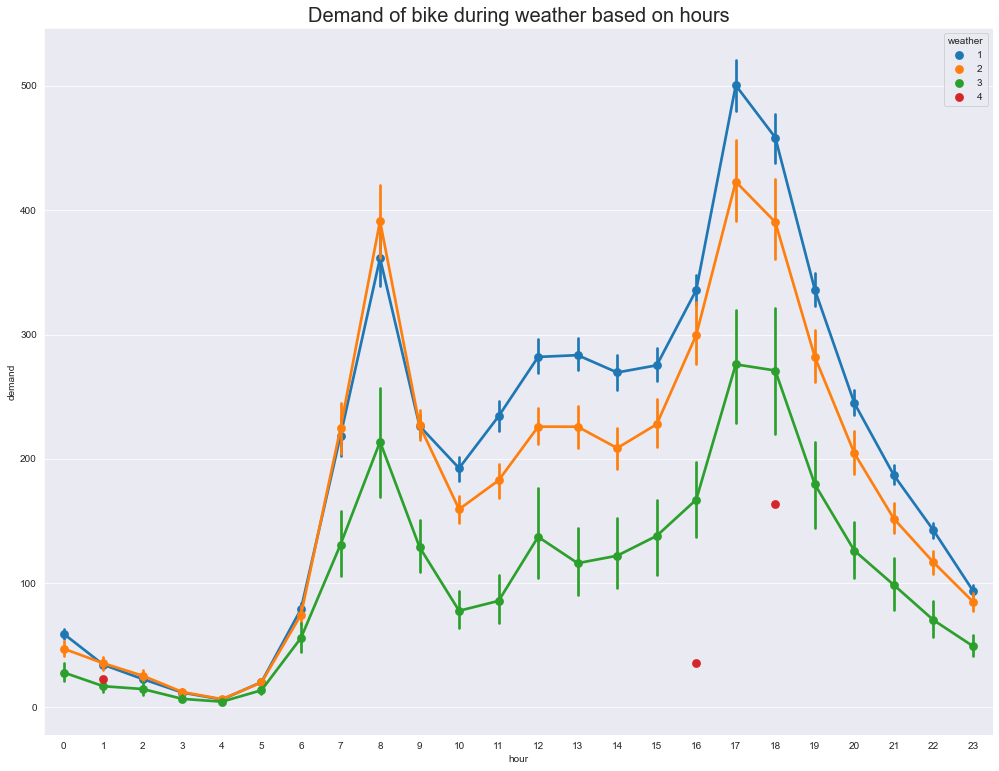

In [16]:
sbn.pointplot(x='hour',y='demand',hue='weather',data=data)
plt.title("Demand of bike during weather based on hours",size=20)
plt.show()

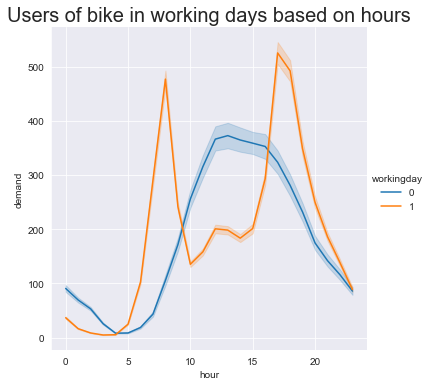

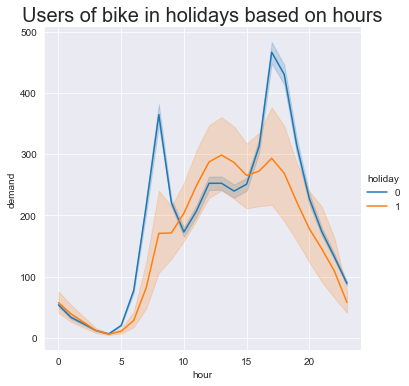

In [17]:
#plt.subplot(1,2,1)
sbn.relplot(data=data, kind="line",x="hour", y="demand",hue="workingday")
plt.title("Users of bike in working days based on hours",size=20)
#plt.subplot(1,2,2)
sbn.relplot(data=data,kind="line",x="hour",y="demand",hue="holiday")
plt.title("Users of bike in holidays based on hours",size=20)
plt.show()

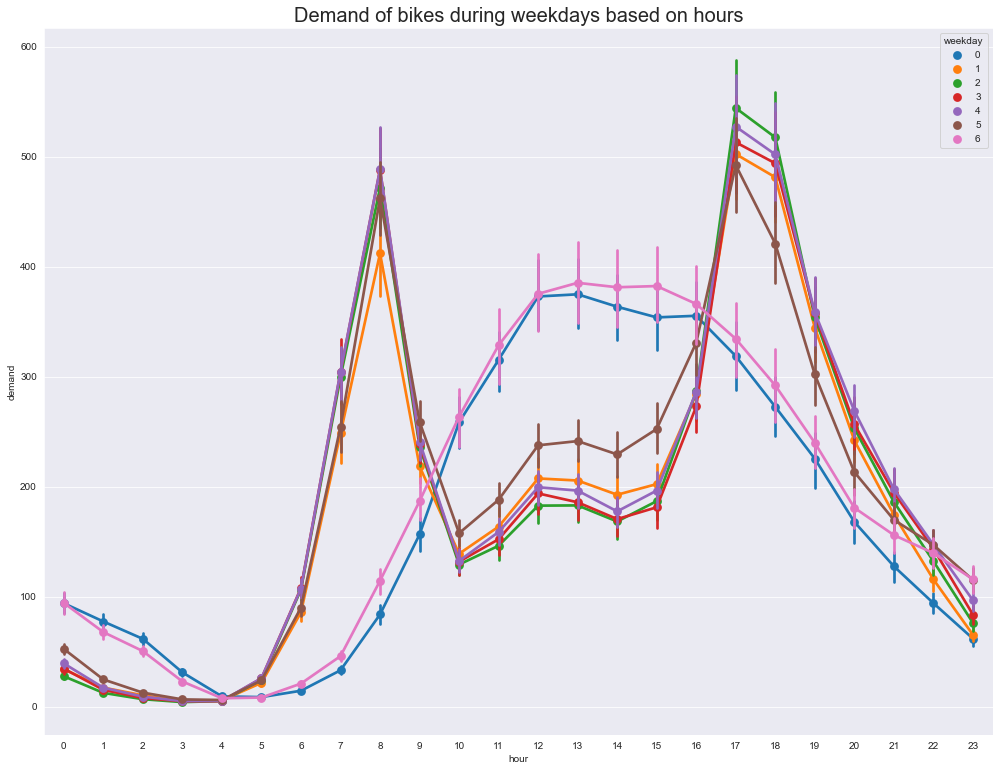

In [22]:
sbn.pointplot(data=data,x='hour',y='demand',hue='weekday')
plt.title("Demand of bikes during weekdays based on hours",size=20)
plt.show()

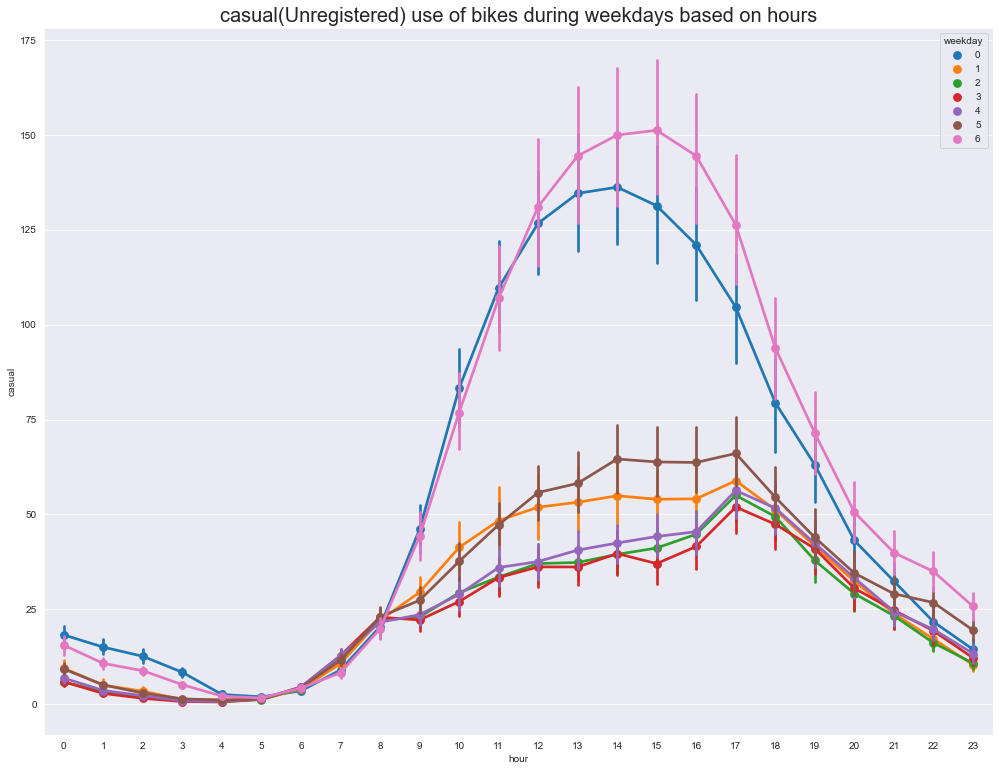

In [23]:
sbn.pointplot(data=data,x='hour',y='casual',hue='weekday')
plt.title("casual(Unregistered) use of bikes during weekdays based on hours",size=20)
plt.show()

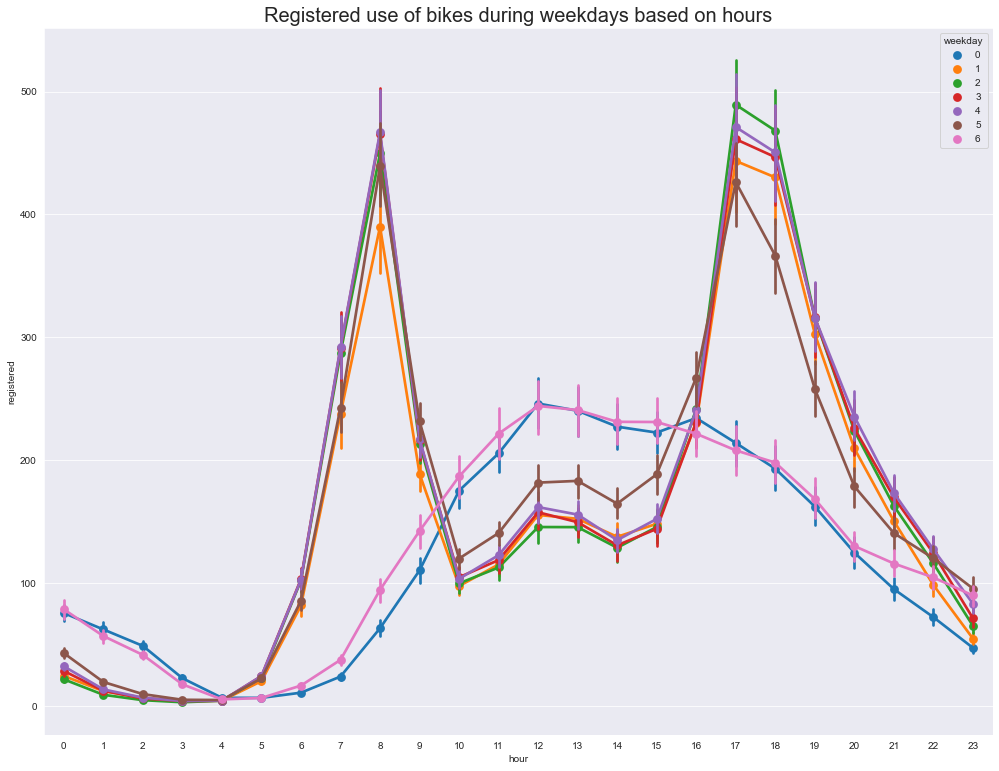

In [24]:
sbn.pointplot(data=data,x='hour',y='registered',hue='weekday')
plt.title("Registered use of bikes during weekdays based on hours",size=20)
plt.show()

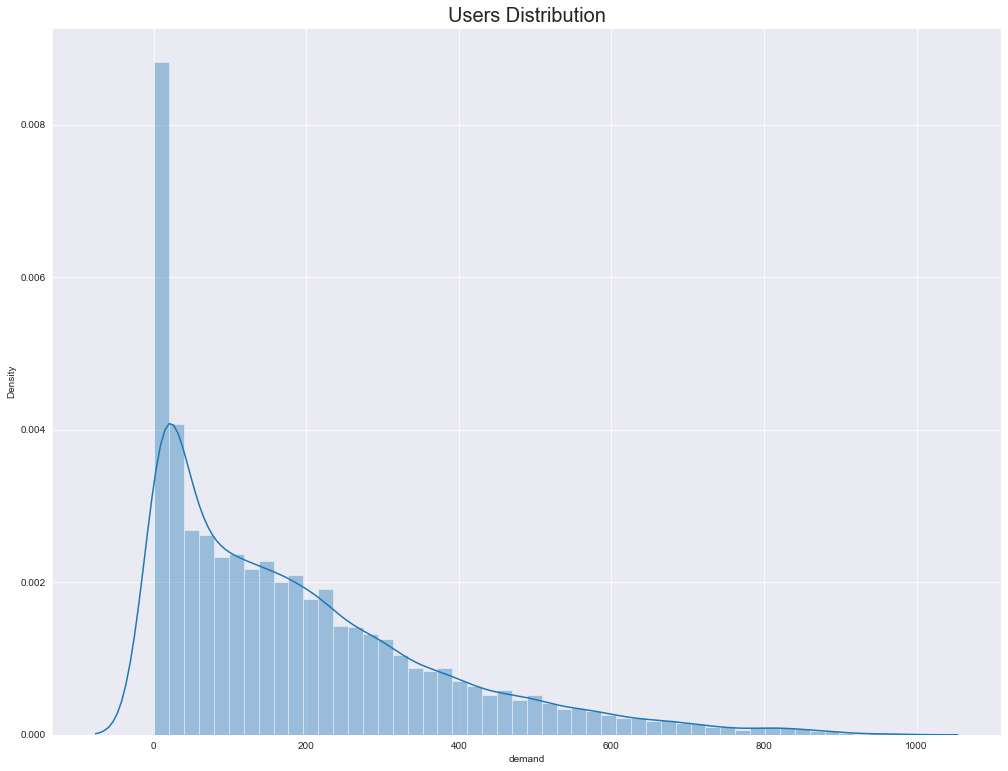

In [25]:
sbn.distplot(data['demand'])
plt.title("Users Distribution",size=20)
plt.show()

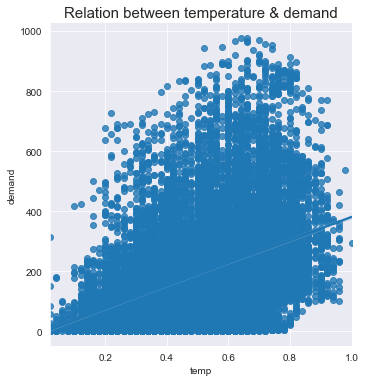

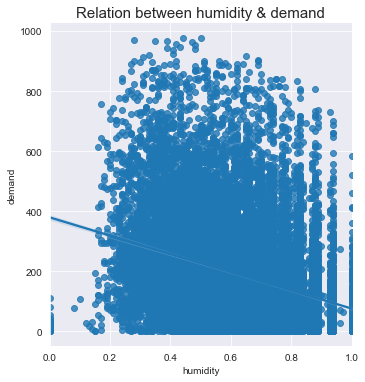

In [26]:
sbn.lmplot(data=data,x='temp',y='demand')
plt.title("Relation between temperature & demand",size=15)
plt.show()
sbn.lmplot(data=data, x="humidity", y="demand")
plt.title("Relation between humidity & demand",size=15)
plt.show()

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Correlation Matrix</h1>


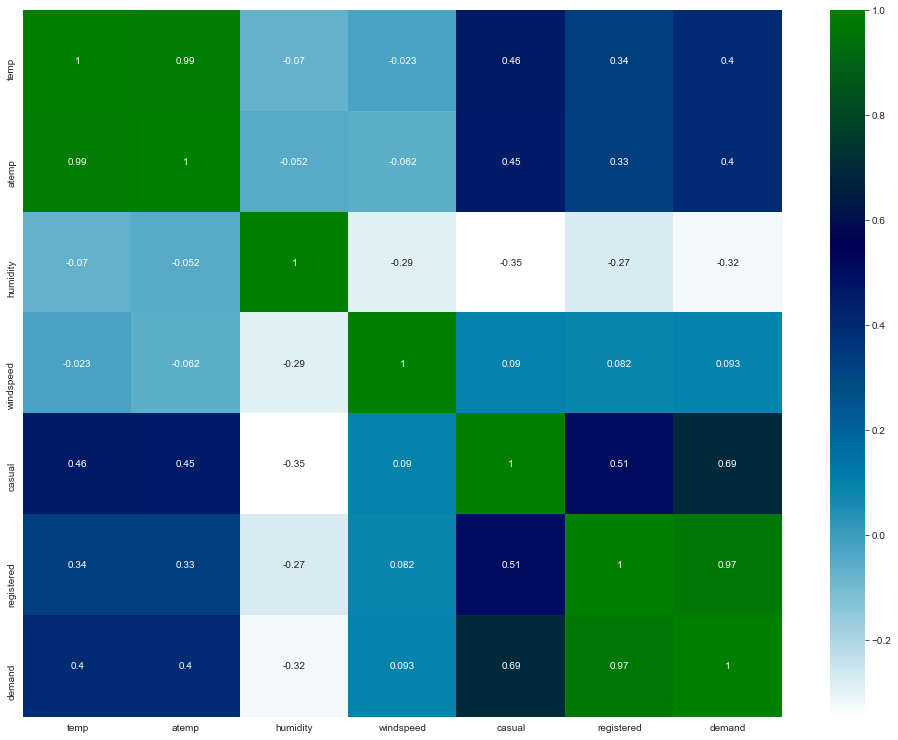

In [27]:
df=pd.DataFrame(data,columns=['temp','atemp','humidity','windspeed','casual','registered','demand'])

correlation=df.corr()
sbn.heatmap(correlation,annot=True,cmap="ocean_r")
plt.show()

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling Data</h1>


In [28]:
x=data.drop(columns=['atemp','windspeed','casual','registered','demand'],axis=1)
y=data['demand']

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [45]:
#logistic regression
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=4,random_state=7)
model_lor=LogisticRegression(solver='lbfgs')
results=cross_val_score(model_lor,x,y,cv=kfold)
print("cv_score:",results.mean()*100)

cv_score: 1.7492111124532972


In [46]:
#linear regression
from sklearn.linear_model import LinearRegression
kfold=KFold(n_splits=4,random_state=7)
model_lr=LinearRegression()
results=cross_val_score(model_lr,x,y,cv=kfold)
print("cv_score:",results.mean()*100)

cv_score: 10.47767097101617


In [47]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=4,random_state=7)
model_rfr=RandomForestRegressor(n_estimators=20,random_state=0)
results=cross_val_score(model_rfr,x,y,cv=kfold)
print("cv_score:",results.mean()*100)

cv_score: 44.48698194876658


In [48]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
kfold=KFold(n_splits=4,random_state=7)
model_dtr=DecisionTreeRegressor(random_state=43)
results=cross_val_score(model_dtr,x,y,cv=kfold)
print("cv_score:",results.mean()*100)

cv_score: 32.343708558612896


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:125%;text-align:left">From all the above four alogrithms, Logistic regression has the less error value, So train the dataset using the Logistic regression alogrithm</h1>


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [52]:
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(x_train,y_train)
prediction=log_reg.predict(x_test)

print(prediction)

[ 91   5 317 ...  21 268  26]


In [61]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,prediction)*100)
print("Score:",log_reg.score(x_test,prediction))

Accuracy 2.3014959723820483
Score: 1.0


In [50]:
newdata=pd.DataFrame()
newdata['Actual']=y_test
newdata['Predicted']=prediction
newdata.reset_index(drop=True,inplace=True)
newdata

,Actual,Predicted
0,99,91
1,4,5
2,501,317
3,21,5
4,374,245
...,...,...
3471,24,2
3472,449,6
3473,130,21
3474,459,268
